<a href="https://colab.research.google.com/github/lorischl-otter/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
import pandas as pd

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voting_records = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                             header=None,
                             names=column_headers,
                             na_values='?')
voting_records.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [2]:
voting_records = voting_records.replace({'y': 1, 'n': 0})
voting_records.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


1. Generate and numerically represent a confidence interval

In [0]:
from scipy import stats
import numpy as np

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

In [4]:
CI_budget = confidence_interval(voting_records['budget'].dropna())
CI_budget

(0.5498151808536169, 0.5966981132075472, 0.6435810455614774)

2. Graphically (with a plot) represent the confidence interval


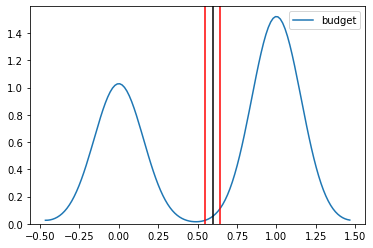

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(voting_records['budget'].dropna())
plt.axvline(x=CI_budget[0], color='red')
plt.axvline(x=CI_budget[2], color='red')
plt.axvline(x=CI_budget[1], color='k');

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

I'm still wrapping my brain around this one ! But I think from what I understand, this confidence interval is tight. The mean is .6 with a margin of error or .0469 or +/- 4.69%. I'm still struggling to articulate exactly what else that can definitively tell us about the data though !

4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy



In [6]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-07 22:47:33--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  21.67M   663KB/s    in 35s     

2019-11-07 22:48:09 (627 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22727580]



In [7]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [8]:
!head LoanStats_2018Q4.csv


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')


In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['annual_inc'].max()

9757200.0

In [12]:
cut_points = [0, 50000, 100000, 150000, 200000, 500000, 1000000, 
              10000000]
label_names = ['0-50,000', '50,001-100,000', '100,001-150,000', 
              '150,001-200,000', '200,001-500,000', '500,001-1,000,000', '1,000,000+']
df['salary_categories'] = pd.cut(df['annual_inc'], cut_points, labels=label_names)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,salary_categories
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,"200,001-500,000"
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,"50,001-100,000"
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,...,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,"50,001-100,000"
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,...,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,"0-50,000"
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,...,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,"50,001-100,000"


In [13]:
contingency_table = pd.crosstab(df['salary_categories'], df['home_ownership'], margins=True)
contingency_table

home_ownership,ANY,MORTGAGE,OWN,RENT,All
salary_categories,,,,,
"0-50,000",197,12617,5891,20076,38781
"50,001-100,000",104,31419,5952,23040,60515
"100,001-150,000",22,12496,1394,5202,19114
"150,001-200,000",5,3961,429,1309,5704
"200,001-500,000",4,2652,288,821,3765
"500,001-1,000,000",1,168,18,46,233
"1,000,000+",0,36,9,23,68
All,333,63349,13981,50517,128180


In [14]:
# this was my first thought for getting rid of the "any" category,
# as I don't think it's useful here. But then I realized that 
# this doesn't change the totals to reflect, so I have to figure out
# how to drop those before making the cross tab

contingency_table = contingency_table.drop('ANY', axis=1)
contingency_table

home_ownership,MORTGAGE,OWN,RENT,All
salary_categories,,,,
"0-50,000",12617,5891,20076,38781
"50,001-100,000",31419,5952,23040,60515
"100,001-150,000",12496,1394,5202,19114
"150,001-200,000",3961,429,1309,5704
"200,001-500,000",2652,288,821,3765
"500,001-1,000,000",168,18,46,233
"1,000,000+",36,9,23,68
All,63349,13981,50517,128180


In [15]:
observed = pd.crosstab(df['salary_categories'], df['home_ownership'])
observed

home_ownership,ANY,MORTGAGE,OWN,RENT
salary_categories,,,,
"0-50,000",197,12617,5891,20076
"50,001-100,000",104,31419,5952,23040
"100,001-150,000",22,12496,1394,5202
"150,001-200,000",5,3961,429,1309
"200,001-500,000",4,2652,288,821
"500,001-1,000,000",1,168,18,46
"1,000,000+",0,36,9,23


In [16]:
# dropping the "ANY" column so we're just looking at the data that has a
# specific value for home_ownership

observed = observed.drop('ANY', axis=1)
observed.head()

home_ownership,MORTGAGE,OWN,RENT
salary_categories,,,
"0-50,000",12617,5891,20076
"50,001-100,000",31419,5952,23040
"100,001-150,000",12496,1394,5202
"150,001-200,000",3961,429,1309
"200,001-500,000",2652,288,821


In [17]:
# Chi-Squared using numpy:

# based on this chi-squared, I reject the null hypothesis that 
# salary and level of home ownership are independent of each other

from scipy import stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 8134.373037534614
P-value: 0.0
Degrees of Freedom: 12
Expected: 
 [[1.91186169e+04 4.21944124e+03 1.52459419e+04]
 [2.99340340e+04 6.60638256e+03 2.38705835e+04]
 [9.46020719e+03 2.08784916e+03 7.54394365e+03]
 [2.82389067e+03 6.23227131e+02 2.25188220e+03]
 [1.86359937e+03 4.11292725e+02 1.48610790e+03]
 [1.14957473e+02 2.53708886e+01 9.16716388e+01]
 [3.36944316e+01 7.43629495e+00 2.68692734e+01]]


In [18]:
voting_records.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [19]:
contingency_table_voting = pd.crosstab(voting_records['party'], voting_records['religious-groups'], margins=True)

contingency_table_voting.head()

religious-groups,0.0,1.0,All
party,,,
democrat,135,123,258
republican,17,149,166
All,152,272,424


In [20]:
# just playing around with manual sum syntax ... 
row_sums = contingency_table_voting.iloc[:2, 2]

row_sums

party
democrat      258
republican    166
Name: All, dtype: int64

In [21]:
contingency = pd.crosstab(voting_records['party'], voting_records['religious-groups'])

contingency = contingency.values

print(contingency.shape)
print(contingency)

(2, 2)
[[135 123]
 [ 17 149]]


In [0]:
# expected 
expected_democrat_no = 258*152/424
expected_republican_no = 166*152/424
expected_democrat_yes = 258*272/424
expected_republican_yes = 166*272/424 

In [29]:
expected_democrat_no = contingency_table_voting['All']['democrat']*contingency_table_voting[0.0]['All']/contingency_table_voting['All']['All']
expected_democrat_no

92.49056603773585

In [30]:
expected = [[expected_democrat_no, expected_democrat_yes],
            [expected_republican_no, expected_republican_yes]]

expected = np.array(expected)
expected

array([[ 92.49056604, 165.50943396],
       [ 59.50943396, 106.49056604]])

In [31]:
print(contingency)
print(expected)

[[135 123]
 [ 17 149]]
[[ 92.49056604 165.50943396]
 [ 59.50943396 106.49056604]]


In [32]:
chi2_table = (contingency-expected)**2 / expected
chi2_table

array([[19.53768966, 10.91812069],
       [30.36580682, 16.96912734]])

In [35]:
chi2 = chi2_table.sum().sum()
print('Chi-Squared:', chi2)

Chi-Squared: 77.79074451741738


In [0]:
# Degrees of Freedom = (2-1)(2-1) = 1
# Looking at a chi-squared chart, it is clear that for 1 degree of freedom,
# this chi-squared value has a p-value of <.01, because it is > 6.63,
# which is the value needed for a p-vaue of .01. 

In [34]:
# checking with scipy

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_voting)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 77.79074451741738
P-value: 5.115369129471063e-16
Degrees of Freedom: 4
Expected: 
 [[ 92.49056604 165.50943396 258.        ]
 [ 59.50943396 106.49056604 166.        ]
 [152.         272.         424.        ]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)